In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("house_data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [4]:
col = ['price', 'bedrooms' ,'bathrooms', 'sqft_living', 'floors', 'yr_built', 'city', 'country']
df = df[col]

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city,country
0,313000.0,3.0,1.50,1340,1.5,1955,Shoreline,USA
1,2384000.0,5.0,2.50,3650,2.0,1921,Seattle,USA
2,342000.0,3.0,2.00,1930,1.0,1966,Kent,USA
3,420000.0,3.0,2.25,2000,1.0,1963,Bellevue,USA
4,550000.0,4.0,2.50,1940,1.0,1976,Redmond,USA


In [6]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
yr_built       0
city           0
country        0
dtype: int64

In [7]:
df.city.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [8]:
cities_to_keep = ['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 
                  'Kent', 'Auburn', 'Sammamish', 'Federal Way', 'Shoreline', 'Woodinville']
df = df[df['city'].isin(cities_to_keep)]

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city,country
0,313000.0,3.0,1.50,1340,1.5,1955,Shoreline,USA
1,2384000.0,5.0,2.50,3650,2.0,1921,Seattle,USA
2,342000.0,3.0,2.00,1930,1.0,1966,Kent,USA
3,420000.0,3.0,2.25,2000,1.0,1963,Bellevue,USA
4,550000.0,4.0,2.50,1940,1.0,1976,Redmond,USA


In [10]:
df['country'].value_counts()

country
USA    3683
Name: count, dtype: int64

In [11]:
df.drop('country', axis='columns',inplace=True) # axis = 1(rows) or 0(columns)

In [12]:
df.drop(0, axis=0,inplace=True) # axis = 1(rows) or 0(columns)

In [130]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,1.50,1340,1.5,1955,Shoreline
1,2384000.0,5.0,2.50,3650,2.0,1921,Seattle
2,342000.0,3.0,2.00,1930,1.0,1966,Kent
3,420000.0,3.0,2.25,2000,1.0,1963,Bellevue
4,550000.0,4.0,2.50,1940,1.0,1976,Redmond


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='yr_built', ylabel='Count'>

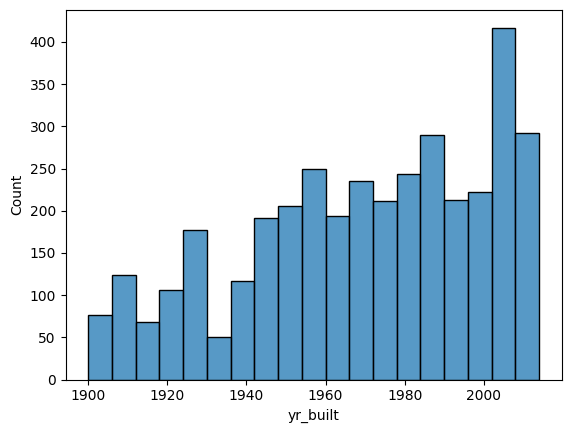

In [132]:
sns.histplot(data=df['yr_built'],)

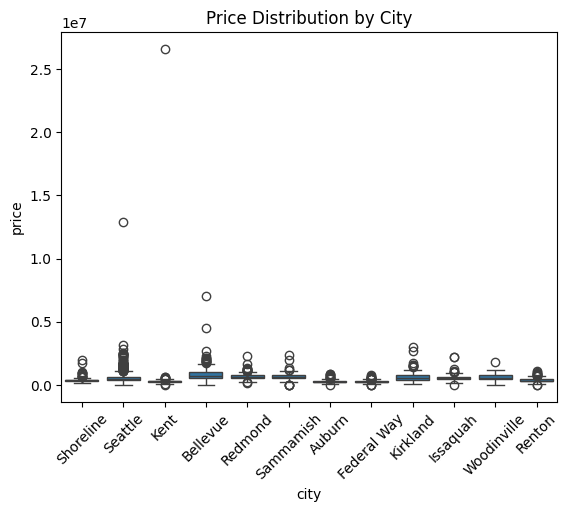

In [133]:
sns.boxplot(x='city', y='price', data=df)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()

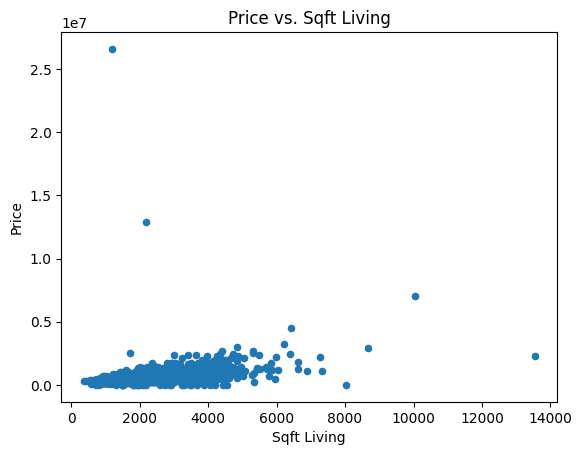

In [134]:
df.plot.scatter(x='sqft_living', y='price')
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()


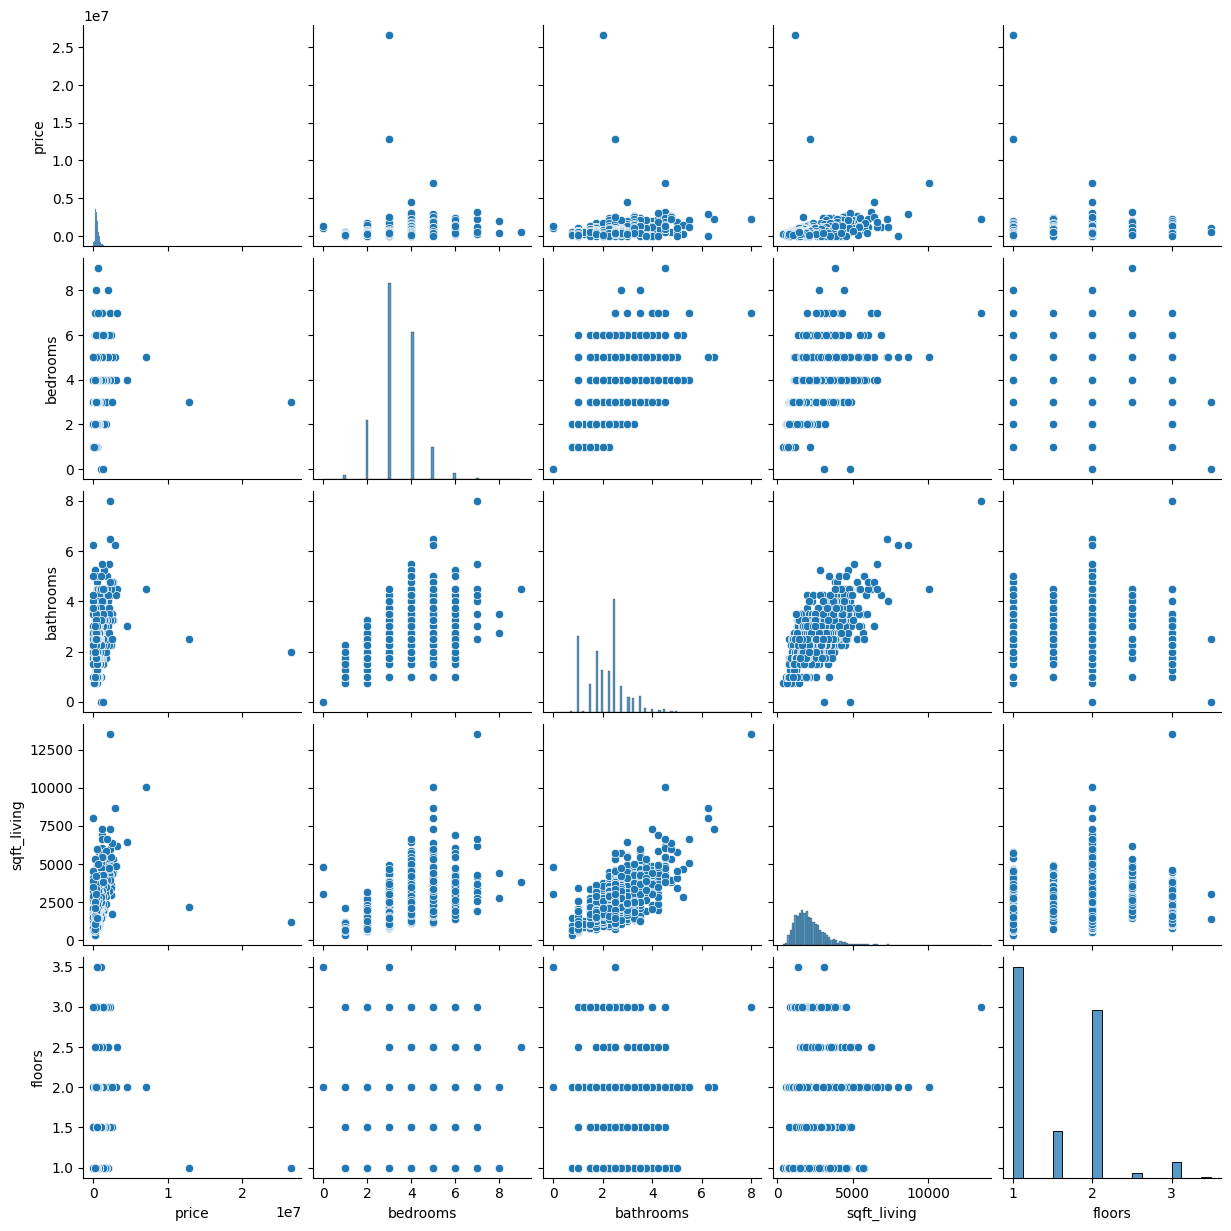

In [135]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])
plt.show()

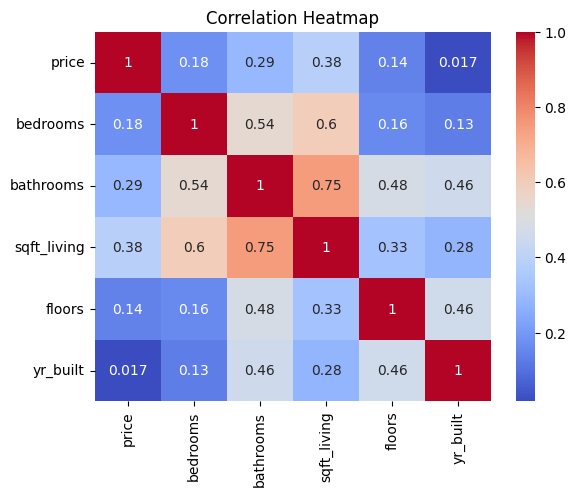

In [136]:
corr_matrix = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


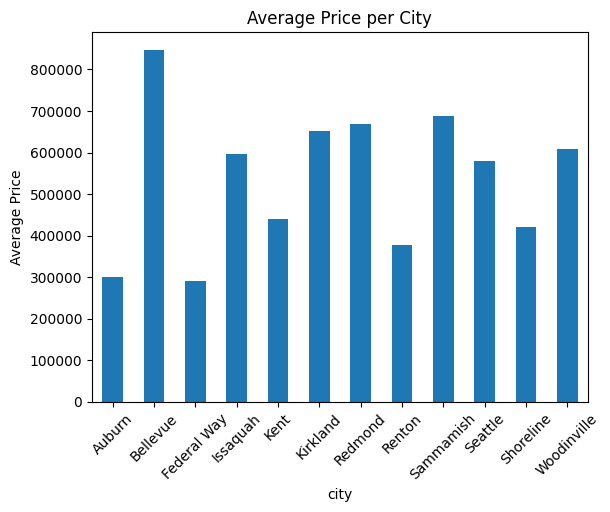

In [137]:
df.groupby('city')['price'].mean().plot(kind='bar')
plt.title('Average Price per City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

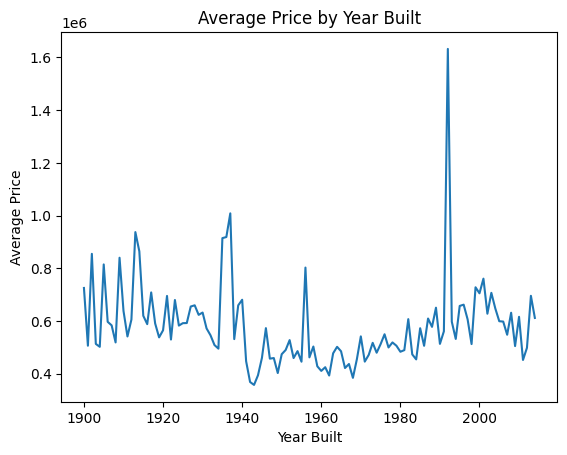

In [138]:
df.groupby('yr_built')['price'].mean().plot(kind='line')
plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.show()

In [139]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned


df_outliers = remove_outliers(df, 'price')

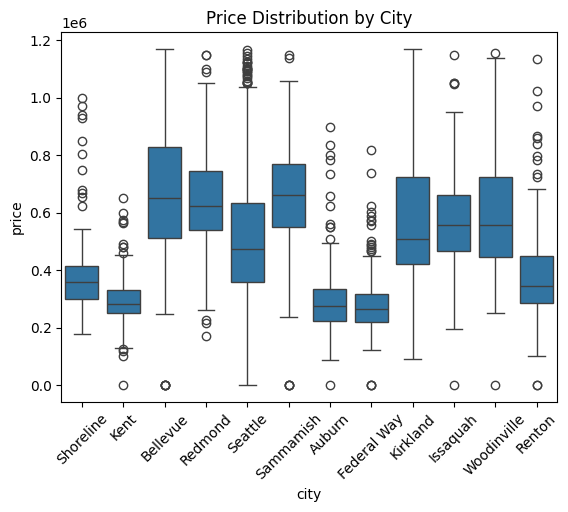

In [140]:
sns.boxplot(x='city', y='price', data=df_outliers)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()

In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_outliers['city_encoded'] = label_encoder.fit_transform(df_outliers['city'])
df_outliers.head()

C:\Users\Leander Antony\AppData\Local\Temp\ipykernel_36744\3871053099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['city_encoded'] = label_encoder.fit_transform(df_outliers['city'])


,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city,city_encoded
0,313000.0,3.0,1.50,1340,1.5,1955,Shoreline,10
2,342000.0,3.0,2.00,1930,1.0,1966,Kent,4
3,420000.0,3.0,2.25,2000,1.0,1963,Bellevue,1
4,550000.0,4.0,2.50,1940,1.0,1976,Redmond,6
5,490000.0,2.0,1.00,880,1.0,1938,Seattle,9


In [142]:
df_outliers.bathrooms.max()

6.25

In [143]:
df_processed = df_outliers

In [162]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler()
# scaler = StandardScaler()
df_processed[[ 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','city_encoded']] = scaler.fit_transform(
    df_processed[[ 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','city_encoded']]
)
df_processed.head()

C:\Users\Leander Antony\AppData\Local\Temp\ipykernel_36744\2771119911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed[[ 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','city_encoded']] = scaler.fit_transform(


,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city,city_encoded
0,313000.0,0.333333,0.24,0.126797,0.2,0.482456,Shoreline,0.909091
2,342000.0,0.333333,0.32,0.203922,0.0,0.578947,Kent,0.363636
3,420000.0,0.333333,0.36,0.213072,0.0,0.552632,Bellevue,0.090909
4,550000.0,0.444444,0.40,0.205229,0.0,0.666667,Redmond,0.545455
5,490000.0,0.222222,0.16,0.066667,0.0,0.333333,Seattle,0.818182


In [163]:
df_processed.bathrooms.max()

1.0

In [164]:
import pickle 
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [166]:
# Define features and target variable
X = df_outliers[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','city_encoded']]
y = df_outliers['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 28993308431.832138
R² Score: 0.39500845446035726


In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, error_score='raise')


grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}


In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


best_rf = RandomForestRegressor(
    max_depth=10,
    max_features='log2',
    min_samples_split=10,
    n_estimators=200
)


best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 22218757564.284966
R² Score: 0.5363702452104754


In [169]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(max_depth=10, max_features='log2', min_samples_split=10, n_estimators=200),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}


results = {}


for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    results[name] = {
        'MSE': mse,
        'R²': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)


                                    MSE        R²
Linear Regression          2.899331e+10  0.395008
Ridge Regression           2.893883e+10  0.396145
Lasso Regression           2.899305e+10  0.395014
Random Forest              2.220994e+10  0.536554
Gradient Boosting          1.939447e+10  0.595303
Support Vector Regression  4.901291e+10 -0.022732


In [170]:
best_model = GradientBoostingRegressor() 
best_model.fit(X_train, y_train)


with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)